In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/automni/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# PPO_EKF_25

|||
|-|-|
| randomize_offset | false |
| horizon | 32768 |
| reward_fn | rw_distance_normalized |
| map | Town01 |

In [4]:
avg_dist_25 = pd.read_csv('data/PPO_EKF_25/eval_avg_dist_predictions.csv', index_col=0)
avg_dist_25 = avg_dist_25.sort_values(by='step')
avg_dist_25.drop_duplicates(subset='step', keep='first', inplace=True)
print(avg_dist_25.shape)
avg_dist_25.head()

(70, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,5,1749852778556,126.661554
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,10,1749856765165,86.946263
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,15,1749860807634,32.458131
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,20,1749864898832,32.647770
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,25,1749869094273,83.141841


In [5]:
train_reward_25 = pd.read_csv('data/PPO_EKF_25/train_reward.csv', index_col=0)
train_reward_25 = train_reward_25.sort_values(by='step')
train_reward_25.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_reward_25.shape)
train_reward_25.head()

(323, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,1,1749850399655,144327.713730
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,2,1749851175264,151009.094475
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,3,1749851960735,159716.166054
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,4,1749852745728,161261.979895
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,5,1749853566088,161316.518142


In [6]:
train_std_25 = pd.read_csv('data/PPO_EKF_25/train_std.csv', index_col=0)
train_std_25 = train_std_25.sort_values(by='step')
train_std_25.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_std_25.shape)
train_std_25.head()

(323, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,1,1749850400084,0.398563
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,2,1749851175600,0.396879
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,3,1749851961094,0.395176
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,4,1749852746157,0.393535
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,5,1749853566527,0.391914


In [7]:
# Group train_reward_25 by 'Run' and calculate the total elapsed time
timestamps = train_reward_25[train_reward_25['step'] <= 1000].groupby('Run')['timestamp']
total_time = timestamps.apply(lambda x: (x.max() - x.min())/(60*60*1e3))
print(f"\nTotal elapsed time for each run:\n{total_time}")
# Show total elapsed time for all runs in hours and minutes
total_hours = int(total_time.sum())
total_minutes = int((total_time.sum() - total_hours) * 60)
print(f"\nTotal elapsed time for all runs: {total_hours}:{total_minutes}")


Total elapsed time for each run:
Run
PPO_EKF_25 (1-80)       19.141203
PPO_EKF_25 (131-157)     5.973784
PPO_EKF_25 (158-200)    10.076744
PPO_EKF_25 (201-        10.495788
PPO_EKF_25 (245-282)     9.146307
PPO_EKF_25 (280-350)    18.097746
PPO_EKF_25 (80-85)       0.865176
PPO_EKF_25 (85-90)       1.830079
PPO_EKF_25 (90-130)      9.145341
Name: timestamp, dtype: float64

Total elapsed time for all runs: 84:46


# PPO_EKF_30

|||
|-|-|
| randomize_offset | false |
| horizon | 16384 |
| reward_fn | rw_distance_normalized |
| map | Town01 |

In [8]:
avg_dist_30 = pd.read_csv('data/PPO_EKF_30/eval_avg_dist_predictions.csv', index_col=0)
avg_dist_30 = avg_dist_30.sort_values(by='step')
avg_dist_30.drop_duplicates(subset='step', keep='first', inplace=True)
print(avg_dist_30.shape)
avg_dist_30.head()

(20, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,5,1750560480416,148.714148
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,10,1750562600622,154.063512
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,15,1750564750839,59.542353
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,20,1750566906415,57.072532
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,25,1750569086082,35.598136


In [9]:
train_reward_30 = pd.read_csv('data/PPO_EKF_30/train_reward.csv', index_col=0)
train_reward_30 = train_reward_30.sort_values(by='step')
train_reward_30.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_reward_30.shape)
train_reward_30.head()

(101, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,1,1750559194773,48206.568284
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,2,1750559612953,51498.977193
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,3,1750560029143,52116.320695
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,4,1750560447840,51424.229096
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,5,1750560894600,54587.396544


In [10]:
train_std_30 = pd.read_csv('data/PPO_EKF_30/train_std.csv', index_col=0)
train_std_30 = train_std_30.sort_values(by='step')
train_std_30.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_std_30.shape)
train_std_30.head()

(101, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,1,1750559195161,0.399497
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,2,1750559613287,0.398768
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,3,1750560029477,0.397882
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,4,1750560448169,0.397014
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,5,1750560894971,0.396078


# PPO_EKF_29

|||
|-|-|
| randomize_offset | false |
| horizon | 32768 |
| reward_fn | rw_negative_distance |
| map | Town01 |

In [11]:
avg_dist_29 = pd.read_csv('data/PPO_EKF_29/eval_avg_dist_predictions.csv', index_col=0)
avg_dist_29 = avg_dist_29.sort_values(by='step')
avg_dist_29.drop_duplicates(subset='step', keep='first', inplace=True)
print(avg_dist_29.shape)
avg_dist_29.head()

(20, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,eval/avg_dist_predictions,5,1750464122517,179.579847
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,eval/avg_dist_predictions,10,1750468381123,120.782521
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,eval/avg_dist_predictions,15,1750472716165,31.939177
PPO_EKF_29 (15-96),d625ca3fae614398b94f6427262dbd9b,eval/avg_dist_predictions,20,1750528536829,62.811744
PPO_EKF_29 (15-96),d625ca3fae614398b94f6427262dbd9b,eval/avg_dist_predictions,25,1750532704801,55.033376


In [12]:
train_reward_29 = pd.read_csv('data/PPO_EKF_29/train_reward.csv', index_col=0)
train_reward_29 = train_reward_29.sort_values(by='step')
train_reward_29.drop_duplicates(subset='step', keep='first', inplace=True)
train_reward_29['value'] = train_reward_29['value'].str.lstrip("'").astype(float)
print(train_reward_29.shape)
train_reward_29.head()

(100, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/reward,1,1750461475430,-14747.825749
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/reward,2,1750462353736,-14995.254315
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/reward,3,1750463232540,-14463.503142
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/reward,4,1750464090005,-13771.536291
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/reward,5,1750464960537,-13252.954643


In [13]:
train_std_29 = pd.read_csv('data/PPO_EKF_29/train_std.csv', index_col=0)
train_std_29 = train_std_29.sort_values(by='step')
train_std_29.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_std_29.shape)
train_std_29.head()

(100, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/std,1,1750461475862,0.401559
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/std,2,1750462354098,0.403192
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/std,3,1750463232870,0.404927
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/std,4,1750464090384,0.406283
PPO_EKF_29 (1-15),5f2f0585cae94a53bd7c89bf17f86bc1,train/std,5,1750464960911,0.407539


# PPO_EKF_31

|||
|-|-|
| randomize_offset | false |
| horizon | 8192 |
| reward_fn | rw_distance_normalized |
| map | Town01 |

In [15]:
avg_dist_31 = pd.read_csv('data/PPO_EKF_31/eval_avg_dist_predictions.csv', index_col=0)
avg_dist_31 = avg_dist_31.sort_values(by='step')
avg_dist_31.drop_duplicates(subset='step', keep='first', inplace=True)
print(avg_dist_31.shape)
avg_dist_31.head()

(27, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,eval/avg_dist_predictions,5,1750643888950,150.015226
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,eval/avg_dist_predictions,10,1750644982817,102.643457
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,eval/avg_dist_predictions,15,1750646079420,78.734508
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,eval/avg_dist_predictions,20,1750647174481,21.294625
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,eval/avg_dist_predictions,25,1750648283234,90.610763


In [16]:
train_reward_31 = pd.read_csv('data/PPO_EKF_31/train_reward.csv', index_col=0)
train_reward_31 = train_reward_31.sort_values(by='step')
train_reward_31.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_reward_31.shape)
train_reward_31.head()

(138, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/reward,1,1750643220900,35671.679029
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/reward,2,1750643434358,38920.336209
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/reward,3,1750643645833,38039.152913
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/reward,4,1750643856275,38033.054980
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/reward,5,1750644098371,38717.330859


In [17]:
train_std_31 = pd.read_csv('data/PPO_EKF_31/train_std.csv', index_col=0)
train_std_31 = train_std_31.sort_values(by='step')
train_std_31.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_std_31.shape)
train_std_31.head()

(138, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/std,1,1750643221337,0.399710
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/std,2,1750643434633,0.399320
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/std,3,1750643646175,0.398915
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/std,4,1750643856621,0.398592
PPO_EKF_31,8149e4bc7b554198bc6fca005281a6d9,train/std,5,1750644098741,0.398227


# Experiment: reward functions

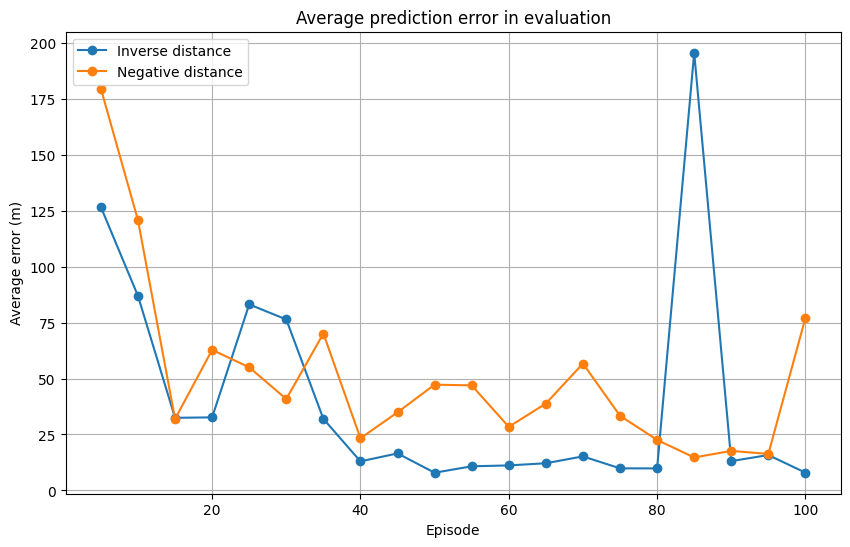

In [62]:
episodes = 100

plt.figure(figsize=(10, 6))
plt.plot(
    avg_dist_25[avg_dist_25['step'] <= episodes]['step'],
    avg_dist_25[avg_dist_25['step'] <= episodes]['value'],
    marker='o',
    label='Inverse distance'
)
plt.plot(
    avg_dist_29[avg_dist_29['step'] <= episodes]['step'],
    avg_dist_29[avg_dist_29['step'] <= episodes]['value'],
    marker='o',
    label='Negative distance'
)
plt.xlabel('Episode')
plt.ylabel('Average error (m)')
plt.title('Average prediction error in evaluation')
plt.grid(True)
plt.legend()
plt.show()

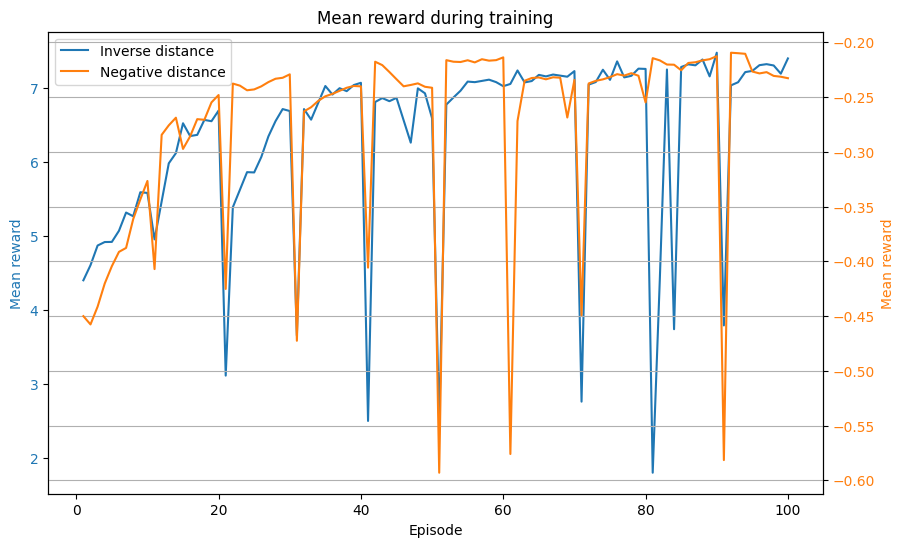

In [56]:
episodes = 100

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
color2 = 'tab:orange'

ln1 = ax1.plot(
    train_reward_25[train_reward_25['step'] <= episodes]['step'],
    train_reward_25[train_reward_25['step'] <= episodes]['value'] / 32768,
    label='Inverse distance',
    color=color1
)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Mean reward', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
ln2 = ax2.plot(
    train_reward_29[train_reward_29['step'] <= episodes]['step'],
    train_reward_29[train_reward_29['step'] <= episodes]['value'] / 32768,
    label='Negative distance',
    color=color2
)
ax2.set_ylabel('Mean reward', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='best')

plt.title('Mean reward during training')
plt.grid(True)
plt.show()

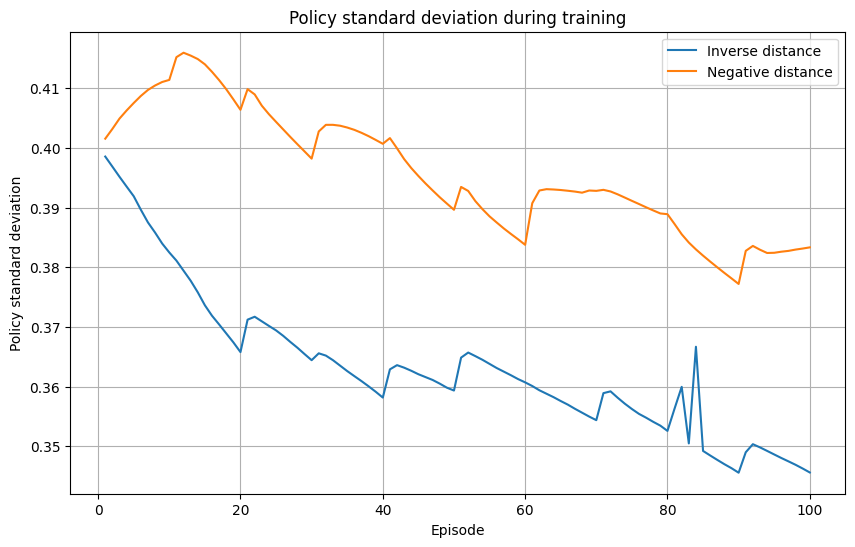

In [48]:
episodes = 100

plt.figure(figsize=(10, 6))
plt.plot(
    train_std_25[train_std_25['step'] <= episodes]['step'],
    train_std_25[train_std_25['step'] <= episodes]['value'],
    # marker='o',
    label='Inverse distance'
)
plt.plot(
    train_std_29[train_std_29['step'] <= episodes]['step'],
    train_std_29[train_std_29['step'] <= episodes]['value'],
    # marker='o',
    label='Negative distance'
)
plt.xlabel('Episode')
plt.ylabel('Policy standard deviation')
plt.title('Policy standard deviation during training')
plt.grid(True)
plt.legend()
plt.show()

# Experiment: long training

/tmp/ipykernel_72242/4207627612.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


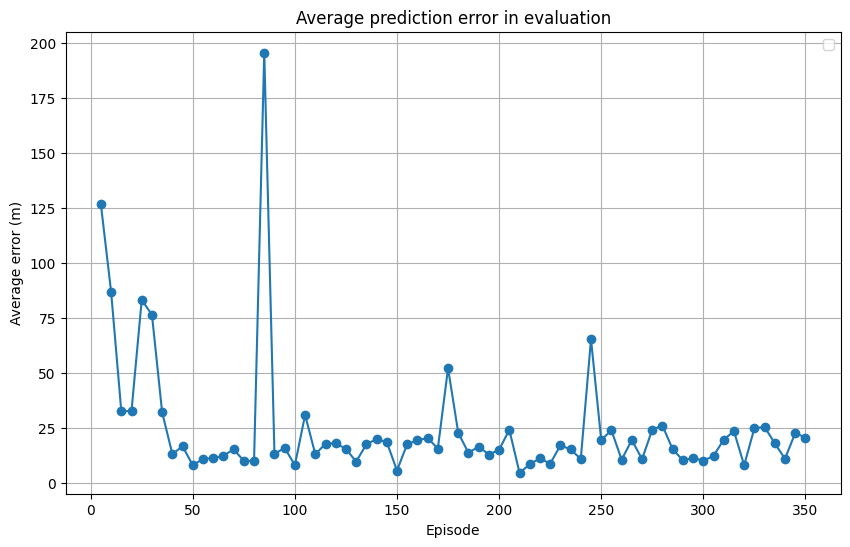

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(avg_dist_25['step'], avg_dist_25['value'], marker='o')
plt.xlabel('Episode')
plt.ylabel('Average error (m)')
plt.title('Average prediction error in evaluation')
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_9459/388017367.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


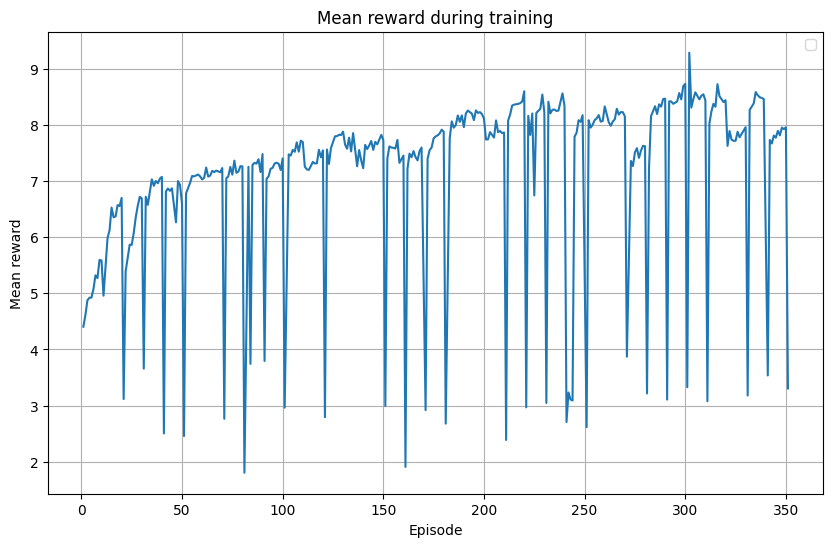

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(train_reward_25['step'], train_reward_25['value'] / 32768)
plt.xlabel('Episode')
plt.ylabel('Mean reward')
plt.title('Mean reward during training')
plt.grid(True)
plt.legend()
plt.show()

# Experiment: horizon

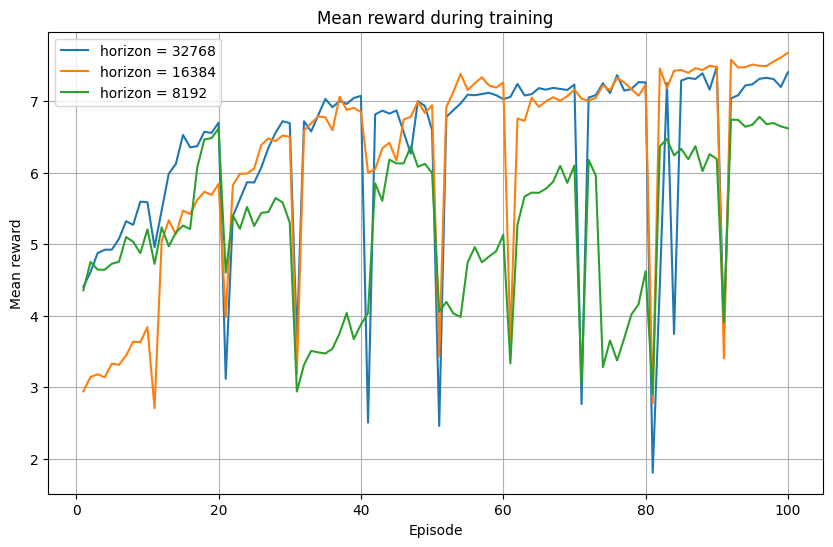

In [20]:
episodes = 100

plt.figure(figsize=(10, 6))
plt.plot(
    train_reward_25[train_reward_25['step'] <= episodes]['step'],
    train_reward_25[train_reward_25['step'] <= episodes]['value'] / 32768,
    label='horizon = 32768'
)
plt.plot(
    train_reward_30[train_reward_30['step'] <= episodes]['step'],
    train_reward_30[train_reward_30['step'] <= episodes]['value'] / 16384,
    label='horizon = 16384'
)
plt.plot(
    train_reward_31[train_reward_31['step'] <= episodes]['step'],
    train_reward_31[train_reward_31['step'] <= episodes]['value'] / 8192,
    label='horizon = 8192'
)
plt.xlabel('Episode')
plt.ylabel('Mean reward')
plt.title('Mean reward during training')
plt.grid(True)
plt.legend()
plt.show()

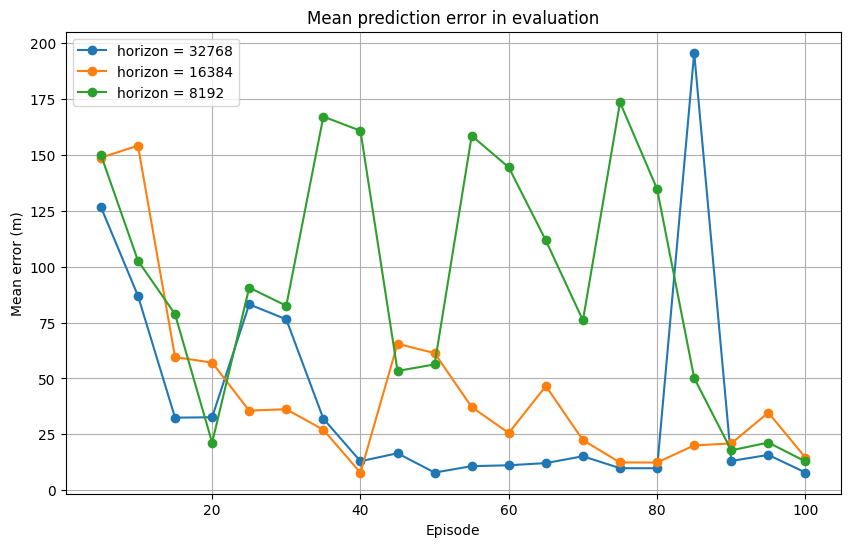

In [21]:
episodes = 100

plt.figure(figsize=(10, 6))
plt.plot(
    avg_dist_25[avg_dist_25['step'] <= episodes]['step'],
    avg_dist_25[avg_dist_25['step'] <= episodes]['value'],
    marker='o',
    label='horizon = 32768'
)
plt.plot(
    avg_dist_30[avg_dist_30['step'] <= episodes]['step'],
    avg_dist_30[avg_dist_30['step'] <= episodes]['value'],
    marker='o',
    label='horizon = 16384'
)
plt.plot(
    avg_dist_31[avg_dist_31['step'] <= episodes]['step'],
    avg_dist_31[avg_dist_31['step'] <= episodes]['value'],
    marker='o',
    label='horizon = 8192'
)
plt.xlabel('Episode')
plt.ylabel('Mean error (m)')
plt.title('Mean prediction error in evaluation')
plt.grid(True)
plt.legend()
plt.show()

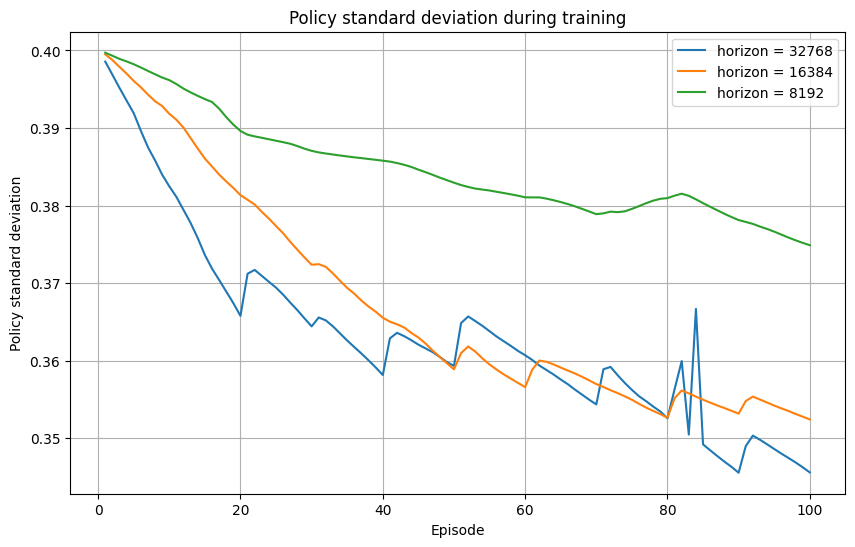

In [22]:
episodes = 100

plt.figure(figsize=(10, 6))
plt.plot(
    train_std_25[train_std_25['step'] <= episodes]['step'],
    train_std_25[train_std_25['step'] <= episodes]['value'],
    label='horizon = 32768'
)
plt.plot(
    train_std_30[train_std_30['step'] <= episodes]['step'],
    train_std_30[train_std_30['step'] <= episodes]['value'],
    label='horizon = 16384'
)
plt.plot(
    train_std_31[train_std_31['step'] <= episodes]['step'],
    train_std_31[train_std_31['step'] <= episodes]['value'],
    label='horizon = 8192'
)
plt.xlabel('Episode')
plt.ylabel('Policy standard deviation')
plt.title('Policy standard deviation during training')
plt.grid(True)
plt.legend()
plt.show()